In [1]:
#librerias base
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.ensemble import ExtraTreesClassifier

#keras - tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [2]:
#Carga de datos
diabetes_data = pd.read_csv('./diabetes.csv')

In [3]:
#Exploración de datos
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Preparación de datos 
diabetes_data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


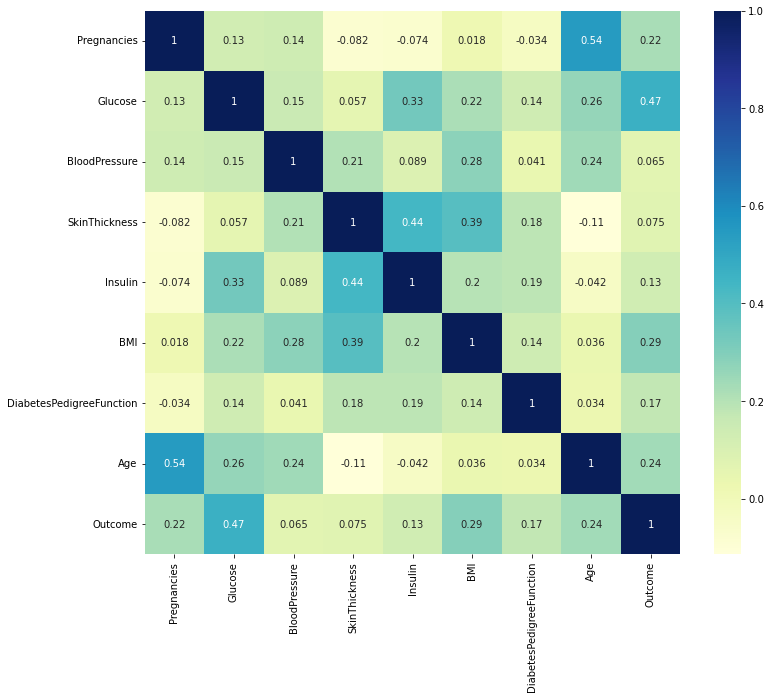

In [7]:
#Matriz de correlación
#df=diabetes_data.drop(['Outcome'],axis=1)
df = diabetes_data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='YlGnBu')

In [8]:
#Normalización de datos
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df.iloc[:, :8])

df_scale = pd.DataFrame(df_scale)
df_scale["Outcome"] = diabetes_data["Outcome"]
df_scale.columns = df.columns

In [9]:
df_scale

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [10]:
#Separar variables dependientes
df_x = df_scale.iloc[:,0:7]
df_y = df_scale.iloc[:,-1:]

In [11]:
#train validation test split 70 train 15 validation 15 test
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3,random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state=42)

In [12]:
x_train.shape

(537, 7)

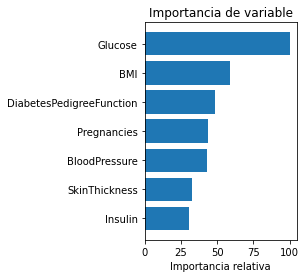

In [13]:
#Importancia de variables

clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

clf.fit(x_train, np.ravel(y_train))

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de variable')
plt.show()

In [14]:
x_train = x_train[["Glucose","BMI","DiabetesPedigreeFunction", "Pregnancies"]]
x_validate = x_validate[["Glucose","BMI","DiabetesPedigreeFunction", "Pregnancies"]]
x_test = x_test[["Glucose","BMI","DiabetesPedigreeFunction", "Pregnancies"]]

In [15]:
def bitacora(confString, stadistics):
  dfdic = pd.DataFrame(stadistics,index=[0])
  dfdic.insert(loc=0,column='configString', value=confString)
  with open("./Bitacora.csv", 'a') as f:
    dfdic.to_csv(f, mode='a', header=False)
    
def SummaryString(model):
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    short_model_summary = "\n".join(stringlist)
    return short_model_summary

## Modelo

In [16]:
alphaRelu = 0.05
ann = keras.Sequential([
    layers.Dense(4,input_shape=(4,)),
    layers.LeakyReLU(alpha=alphaRelu),
    layers.BatchNormalization(),
    layers.Dense(2),
    layers.LeakyReLU(alpha=alphaRelu),
    layers.Dense(2),
    layers.LeakyReLU(alpha=alphaRelu),
    layers.Dense(1,activation='sigmoid'),
])

In [17]:
#Compilación de modelo
ann.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [18]:
#Creación de checkpoint
filepath="./Parte1.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [19]:
#Entrenamiento
ann.fit(x_train, y_train, batch_size=10, epochs=50, validation_data=(x_validate, y_validate), callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.67826, saving model to .\Parte1.weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.67826

Epoch 3: val_accuracy did not improve from 0.67826

Epoch 4: val_accuracy did not improve from 0.67826

Epoch 5: val_accuracy did not improve from 0.67826

Epoch 6: val_accuracy did not improve from 0.67826

Epoch 7: val_accuracy did not improve from 0.67826

Epoch 8: val_accuracy improved from 0.67826 to 0.68696, saving model to .\Parte1.weights.best.hdf5

Epoch 9: val_accuracy improved from 0.68696 to 0.71304, saving model to .\Parte1.weights.best.hdf5

Epoch 10: val_accuracy improved from 0.71304 to 0.73043, saving model to .\Parte1.weights.best.hdf5

Epoch 11: val_accuracy did not improve from 0.73043

Epoch 12: val_accuracy improved from 0.73043 to 0.73913, saving model to .\Parte1.weights.best.hdf5

Epoch 13: val_accuracy improved from 0.73913 to 0.75652, saving model to .\Parte1.weights.best.hdf5

Epoch 14: val_accuracy did not imp

In [20]:
#Metricas
res_dict_tree = defaultdict(lambda: "Not present")
test_loss, test_acc = ann.evaluate(x_test, y_test)
res_dict_tree["Accuracy_test"] = test_acc
res_dict_tree["Test_loss"] = test_loss
ss = SummaryString(ann)
bitacora(ss,res_dict_tree)

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7931


# Conclusiones

Luego de realizar distintos experimentos, adjuntos en archivo Bitacora.csv, se establecio una red neural sencilla con 2 capas intermedias de 2 neuronas cada una, se utilizo la función de activación LeakyReLU que obtuvo mejores resultados que la función Relu.

Adjunto diagrama final de modelo.


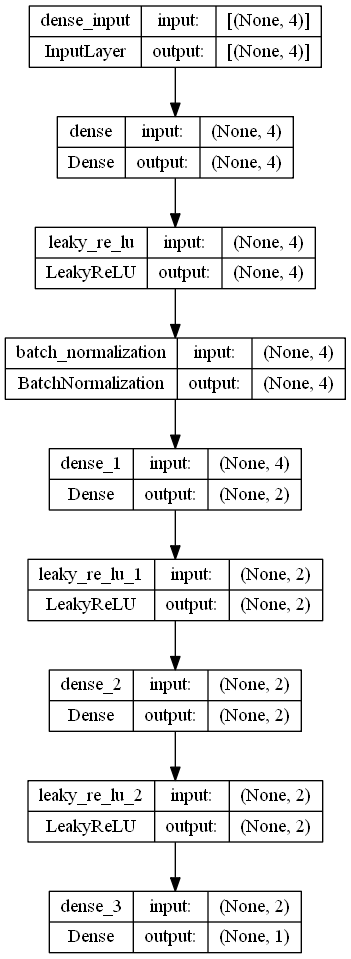

In [21]:
plot_model(ann, to_file='Parte1.png', show_shapes=True, show_layer_names=True)

# Publicación
El proceso de publicación de la red entrenada a produción se puede realizar guardando los pesos de la red en un archivo ***HDF5***, formato utilizado por Keras.

Para realizar un despliegue por ejemplo a una página web, se puede usar un framework muy liviando de frontend para utlizar python como backend, según la investigación realizada ***Flask*** es la herramienta utilizada generalmente.